In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
import os
from keras.applications.densenet import DenseNet169, DenseNet121
from keras.applications.mobilenet import MobileNet
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report
import lightgbm as lgb
import seaborn as sns

In [2]:
SIZE = 224
images = []
images_labels = [] 

In [3]:
import glob
import os
import cv2
import numpy as np

SIZE = 224  # Assuming you have defined the size variable

ext = ['png']

images = []  # Initialize empty list for images
images_labels = []  # Initialize empty list for image labels

for directory_path in glob.glob("D:/Data_set/COVID-19_Radiography_Dataset/*"):
    splited = directory_path.split("/")
    label = splited[-1]
    print(label)
    for e in ext:
        for img_path in glob.glob(os.path.join(directory_path, "*." + e)):
            print(img_path)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (SIZE, SIZE))
            images.append(img)
            images_labels.append(label)

COVID-19_Radiography_Dataset\COVID
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-10.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-100.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1000.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1001.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1002.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1003.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1004.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1005.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1006.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1007.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1008.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1009.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-101.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1010.png
D:/Data_set/COVID-19_Radiography_Dataset\C

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1122.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1123.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1124.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1125.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1126.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1127.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1128.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1129.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-113.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1130.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1131.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1132.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1133.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1134.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1135.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1136.png
D:/Data_s

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1249.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-125.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1250.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1251.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1252.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1253.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1254.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1255.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1256.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1257.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1258.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1259.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-126.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1260.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1261.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1262.png
D:/Data_se

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1373.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1374.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1375.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1376.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1377.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1378.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1379.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-138.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1380.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1381.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1382.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1383.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1384.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1385.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1386.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1387.png
D:/Data_s

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1497.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1498.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1499.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-15.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-150.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1500.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1501.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1502.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1503.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1504.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1505.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1506.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1507.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1508.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1509.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-151.png
D:/Data_set/

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1619.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-162.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1620.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1621.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1622.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1623.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1624.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1625.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1626.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1627.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1628.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1629.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-163.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1630.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1631.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1632.png
D:/Data_se

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1747.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1748.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1749.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-175.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1750.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1751.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1752.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1753.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1754.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1755.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1756.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1757.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1758.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1759.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-176.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1760.png
D:/Data_se

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1871.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1872.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1873.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1874.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1875.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1876.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1877.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1878.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1879.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-188.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1880.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1881.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1882.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1883.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1884.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1885.png
D:/Data_s

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1993.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1994.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1995.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1996.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1997.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1998.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-1999.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-20.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-200.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2000.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2001.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2002.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2003.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2004.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2005.png
D:/Data_set/CO

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-212.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2120.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2121.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2122.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2123.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2124.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2125.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2126.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2127.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2128.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2129.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-213.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2130.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2131.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2132.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2133.png
D:/Data_se

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2249.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-225.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2250.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2251.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2252.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2253.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2254.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2255.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2256.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2257.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2258.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2259.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-226.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2260.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2261.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2262.png
D:/Data_se

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2376.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2377.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2378.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2379.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-238.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2380.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2381.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2382.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2383.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2384.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2385.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2386.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2387.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2388.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2389.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-239.png
D:/Data_se

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2504.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2505.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2506.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2507.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2508.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2509.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-251.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2510.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2511.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2512.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2513.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2514.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2515.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2516.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2517.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2518.png
D:/Data_s

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2625.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2626.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2627.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2628.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2629.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-263.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2630.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2631.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2632.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2633.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2634.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2635.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2636.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2637.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2638.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2639.png
D:/Data_s

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2749.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-275.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2750.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2751.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2752.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2753.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2754.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2755.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2756.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2757.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2758.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2759.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-276.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2760.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2761.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2762.png
D:/Data_se

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2872.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2873.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2874.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2875.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2876.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2877.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2878.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2879.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-288.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2880.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2881.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2882.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2883.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2884.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2885.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2886.png
D:/Data_s

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-2999.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-30.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-300.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3000.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3001.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3002.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3003.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3004.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3005.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3006.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3007.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3008.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3009.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-301.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3010.png
D:/Data_set/COV

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-312.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3120.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3121.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3122.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3123.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3124.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3125.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3126.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3127.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3128.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3129.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-313.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3130.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3131.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3132.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3133.png
D:/Data_se

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3244.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3245.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3246.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3247.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3248.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3249.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-325.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3250.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3251.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3252.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3253.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3254.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3255.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3256.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3257.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3258.png
D:/Data_s

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3365.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3366.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3367.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3368.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3369.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-337.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3370.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3371.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3372.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3373.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3374.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3375.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3376.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3377.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3378.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3379.png
D:/Data_s

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3496.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3497.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3498.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3499.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-35.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-350.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3500.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3501.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3502.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3503.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3504.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3505.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3506.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3507.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3508.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3509.png
D:/Data_set

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3615.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-3616.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-362.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-363.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-364.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-365.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-366.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-367.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-368.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-369.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-37.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-370.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-371.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-372.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-373.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-374.png
D:/Data_set/COVID-19_Ra

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-491.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-492.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-493.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-494.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-495.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-496.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-497.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-498.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-499.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-5.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-50.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-500.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-501.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-502.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-503.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-504.png
D:/Data_set/COVID-19_Radiog

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-613.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-614.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-615.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-616.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-617.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-618.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-619.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-62.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-620.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-621.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-622.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-623.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-624.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-625.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-626.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-627.png
D:/Data_set/COVID-19_Radi

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-738.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-739.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-74.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-740.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-741.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-742.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-743.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-744.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-745.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-746.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-747.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-748.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-749.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-75.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-750.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-751.png
D:/Data_set/COVID-19_Radio

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-862.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-863.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-864.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-865.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-866.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-867.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-868.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-869.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-87.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-870.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-871.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-872.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-873.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-874.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-875.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-876.png
D:/Data_set/COVID-19_Radi

D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-989.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-99.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-990.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-991.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-992.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-993.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-994.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-995.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-996.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-997.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-998.png
D:/Data_set/COVID-19_Radiography_Dataset\COVID\COVID-999.png
COVID-19_Radiography_Dataset\Normal
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-10.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-100.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-10109.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1011.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-10110.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-10111.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-10112.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-10113.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-10114.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-10115.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-10116.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-10117.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-10118.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-10119.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1012.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-10120.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-10121.png
D:/Data_set/COVID-19_Radiog

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1056.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1057.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1058.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1059.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-106.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1060.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1061.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1062.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1063.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1064.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1065.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1066.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1067.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1068.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1069.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1178.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1179.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-118.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1180.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1181.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1182.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1183.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1184.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1185.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1186.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1187.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1188.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1189.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-119.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1190.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1297.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1298.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1299.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-13.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-130.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1300.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1301.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1302.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1303.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1304.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1305.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1306.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1307.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1308.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1309.png
D:/Data_set/COVID-19_Radiography_Dataset\No

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-142.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1420.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1421.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1422.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1423.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1424.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1425.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1426.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1427.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1428.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1429.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-143.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1430.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1431.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1432.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1545.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1546.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1547.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1548.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1549.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-155.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1550.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1551.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1552.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1553.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1554.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1555.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1556.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1557.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1558.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1661.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1662.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1663.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1664.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1665.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1666.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1667.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1668.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1669.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-167.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1670.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1671.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1672.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1673.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1674.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1784.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1785.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1786.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1787.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1788.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1789.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-179.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1790.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1791.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1792.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1793.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1794.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1795.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1796.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1797.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-190.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1900.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1901.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1902.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1903.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1904.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1905.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1906.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1907.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1908.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1909.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-191.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1910.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1911.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-1912.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2018.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2019.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-202.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2020.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2021.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2022.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2023.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2024.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2025.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2026.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2027.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2028.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2029.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-203.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2030.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2143.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2144.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2145.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2146.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2147.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2148.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2149.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-215.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2150.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2151.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2152.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2153.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2154.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2155.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2156.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-227.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2270.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2271.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2272.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2273.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2274.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2275.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2276.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2277.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2278.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2279.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-228.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2280.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2281.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2282.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2392.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2393.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2394.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2395.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2396.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2397.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2398.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2399.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-24.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-240.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2400.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2401.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2402.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2403.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2404.png
D:/Data_set/COVID-19_Radiography_Dataset\No

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2519.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-252.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2520.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2521.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2522.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2523.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2524.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2525.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2526.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2527.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2528.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2529.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-253.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2530.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2531.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-264.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2640.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2641.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2642.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2643.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2644.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2645.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2646.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2647.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2648.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2649.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-265.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2650.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2651.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2652.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2762.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2763.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2764.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2765.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2766.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2767.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2768.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2769.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-277.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2770.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2771.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2772.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2773.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2774.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2775.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2883.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2884.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2885.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2886.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2887.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2888.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2889.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-289.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2890.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2891.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2892.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2893.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2894.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2895.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-2896.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3003.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3004.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3005.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3006.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3007.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3008.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3009.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-301.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3010.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3011.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3012.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3013.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3014.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3015.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3016.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3126.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3127.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3128.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3129.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-313.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3130.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3131.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3132.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3133.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3134.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3135.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3136.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3137.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3138.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3139.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3244.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3245.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3246.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3247.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3248.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3249.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-325.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3250.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3251.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3252.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3253.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3254.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3255.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3256.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3257.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3366.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3367.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3368.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3369.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-337.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3370.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3371.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3372.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3373.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3374.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3375.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3376.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3377.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3378.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3379.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3489.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-349.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3490.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3491.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3492.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3493.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3494.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3495.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3496.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3497.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3498.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3499.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-35.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-350.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3500.png
D:/Data_set/COVID-19_Radiography_Dataset\Nor

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3612.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3613.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3614.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3615.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3616.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3617.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3618.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3619.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-362.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3620.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3621.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3622.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3623.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3624.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3625.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3730.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3731.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3732.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3733.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3734.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3735.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3736.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3737.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3738.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3739.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-374.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3740.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3741.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3742.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3743.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3852.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3853.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3854.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3855.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3856.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3857.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3858.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3859.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-386.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3860.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3861.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3862.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3863.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3864.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3865.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3973.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3974.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3975.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3976.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3977.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3978.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3979.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-398.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3980.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3981.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3982.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3983.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3984.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3985.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-3986.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-409.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4090.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4091.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4092.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4093.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4094.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4095.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4096.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4097.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4098.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4099.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-41.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-410.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4100.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4101.png
D:/Data_set/COVID-19_Radiography_Dataset\Nor

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4209.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-421.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4210.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4211.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4212.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4213.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4214.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4215.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4216.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4217.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4218.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4219.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-422.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4220.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4221.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4329.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-433.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4330.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4331.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4332.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4333.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4334.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4335.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4336.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4337.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4338.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4339.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-434.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4340.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4341.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4447.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4448.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4449.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-445.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4450.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4451.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4452.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4453.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4454.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4455.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4456.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4457.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4458.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4459.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-446.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4564.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4565.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4566.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4567.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4568.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4569.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-457.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4570.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4571.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4572.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4573.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4574.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4575.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4576.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4577.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4687.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4688.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4689.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-469.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4690.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4691.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4692.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4693.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4694.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4695.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4696.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4697.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4698.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4699.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-47.png
D:/Data_set/COVID-19_Radiography_Dataset\No

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4804.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4805.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4806.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4807.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4808.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4809.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-481.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4810.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4811.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4812.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4813.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4814.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4815.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4816.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4817.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4920.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4921.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4922.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4923.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4924.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4925.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4926.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4927.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4928.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4929.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-493.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4930.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4931.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4932.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-4933.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5039.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-504.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5040.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5041.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5042.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5043.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5044.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5045.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5046.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5047.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5048.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5049.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-505.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5050.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5051.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5158.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5159.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-516.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5160.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5161.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5162.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5163.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5164.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5165.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5166.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5167.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5168.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5169.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-517.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5170.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5282.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5283.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5284.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5285.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5286.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5287.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5288.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5289.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-529.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5290.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5291.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5292.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5293.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5294.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5295.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-54.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-540.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5400.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5401.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5402.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5403.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5404.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5405.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5406.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5407.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5408.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5409.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-541.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5410.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5411.png
D:/Data_set/COVID-19_Radiography_Dataset\Nor

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5517.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5518.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5519.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-552.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5520.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5521.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5522.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5523.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5524.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5525.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5526.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5527.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5528.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5529.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-553.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5636.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5637.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5638.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5639.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-564.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5640.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5641.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5642.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5643.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5644.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5645.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5646.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5647.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5648.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5649.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5756.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5757.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5758.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5759.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-576.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5760.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5761.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5762.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5763.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5764.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5765.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5766.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5767.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5768.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5769.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-588.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5880.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5881.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5882.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5883.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5884.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5885.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5886.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5887.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5888.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5889.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-589.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5890.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5891.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-5892.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6004.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6005.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6006.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6007.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6008.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6009.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-601.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6010.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6011.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6012.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6013.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6014.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6015.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6016.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6017.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6125.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6126.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6127.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6128.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6129.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-613.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6130.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6131.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6132.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6133.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6134.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6135.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6136.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6137.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6138.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6247.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6248.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6249.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-625.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6250.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6251.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6252.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6253.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6254.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6255.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6256.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6257.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6258.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6259.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-626.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6368.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6369.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-637.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6370.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6371.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6372.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6373.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6374.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6375.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6376.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6377.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6378.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6379.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-638.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6380.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6484.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6485.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6486.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6487.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6488.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6489.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-649.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6490.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6491.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6492.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6493.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6494.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6495.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6496.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6497.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6601.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6602.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6603.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6604.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6605.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6606.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6607.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6608.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6609.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-661.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6610.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6611.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6612.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6613.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6614.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6725.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6726.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6727.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6728.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6729.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-673.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6730.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6731.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6732.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6733.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6734.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6735.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6736.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6737.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6738.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6841.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6842.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6843.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6844.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6845.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6846.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6847.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6848.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6849.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-685.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6850.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6851.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6852.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6853.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6854.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-696.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6960.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6961.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6962.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6963.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6964.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6965.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6966.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6967.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6968.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6969.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-697.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6970.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6971.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-6972.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7081.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7082.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7083.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7084.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7085.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7086.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7087.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7088.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7089.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-709.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7090.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7091.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7092.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7093.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7094.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7204.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7205.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7206.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7207.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7208.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7209.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-721.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7210.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7211.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7212.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7213.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7214.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7215.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7216.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7217.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7323.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7324.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7325.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7326.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7327.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7328.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7329.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-733.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7330.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7331.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7332.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7333.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7334.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7335.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7336.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7443.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7444.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7445.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7446.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7447.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7448.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7449.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-745.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7450.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7451.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7452.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7453.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7454.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7455.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7456.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-756.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7560.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7561.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7562.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7563.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7564.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7565.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7566.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7567.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7568.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7569.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-757.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7570.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7571.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7572.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7682.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7683.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7684.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7685.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7686.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7687.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7688.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7689.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-769.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7690.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7691.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7692.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7693.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7694.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7695.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7800.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7801.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7802.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7803.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7804.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7805.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7806.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7807.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7808.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7809.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-781.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7810.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7811.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7812.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7813.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7924.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7925.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7926.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7927.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7928.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7929.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-793.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7930.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7931.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7932.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7933.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7934.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7935.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7936.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-7937.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-804.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8040.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8041.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8042.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8043.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8044.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8045.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8046.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8047.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8048.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8049.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-805.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8050.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8051.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8052.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8160.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8161.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8162.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8163.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8164.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8165.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8166.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8167.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8168.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8169.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-817.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8170.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8171.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8172.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8173.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8278.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8279.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-828.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8280.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8281.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8282.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8283.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8284.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8285.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8286.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8287.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8288.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8289.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-829.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8290.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-84.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-840.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8400.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8401.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8402.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8403.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8404.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8405.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8406.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8407.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8408.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8409.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-841.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8410.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8411.png
D:/Data_set/COVID-19_Radiography_Dataset\Nor

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8515.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8516.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8517.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8518.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8519.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-852.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8520.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8521.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8522.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8523.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8524.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8525.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8526.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8527.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8528.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8639.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-864.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8640.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8641.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8642.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8643.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8644.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8645.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8646.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8647.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8648.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8649.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-865.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8650.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8651.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8760.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8761.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8762.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8763.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8764.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8765.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8766.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8767.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8768.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8769.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-877.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8770.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8771.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8772.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8773.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8877.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8878.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8879.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-888.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8880.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8881.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8882.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8883.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8884.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8885.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8886.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8887.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8888.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8889.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-889.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8995.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8996.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8997.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8998.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-8999.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-90.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-900.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9000.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9001.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9002.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9003.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9004.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9005.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9006.png
D:/Data_set/COVID-19_Radiography_Dataset\Norma

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9110.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9111.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9112.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9113.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9114.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9115.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9116.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9117.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9118.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9119.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-912.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9120.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9121.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9122.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9123.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9235.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9236.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9237.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9238.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9239.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-924.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9240.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9241.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9242.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9243.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9244.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9245.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9246.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9247.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9248.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9353.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9354.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9355.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9356.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9357.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9358.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9359.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-936.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9360.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9361.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9362.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9363.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9364.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9365.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9366.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9476.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9477.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9478.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9479.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-948.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9480.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9481.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9482.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9483.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9484.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9485.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9486.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9487.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9488.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9489.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-960.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9600.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9601.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9602.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9603.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9604.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9605.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9606.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9607.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9608.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9609.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-961.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9610.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9611.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9612.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9718.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9719.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-972.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9720.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9721.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9722.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9723.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9724.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9725.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9726.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9727.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9728.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9729.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-973.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9730.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9836.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9837.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9838.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9839.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-984.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9840.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9841.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9842.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9843.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9844.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9845.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9846.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9847.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9848.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9849.png
D:/Data_set/COVID-19_Radiography_Dataset\

D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9959.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-996.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9960.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9961.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9962.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9963.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9964.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9965.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9966.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9967.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9968.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9969.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-997.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9970.png
D:/Data_set/COVID-19_Radiography_Dataset\Normal\Normal-9971.png
D:/Data_set/COVID-19_Radiography_Dataset\N

D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1065.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1066.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1067.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1068.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1069.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-107.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1070.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1071.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1072.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1073.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1074.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1075.png
D:/Data_set/COVID

D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1164.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1165.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1166.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1167.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1168.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1169.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-117.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1170.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1171.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1172.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1173.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1174.png
D:/Data_set/COVID

D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1263.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1264.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1265.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1266.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1267.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1268.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1269.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-127.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1270.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1271.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1272.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-1273.png
D:/Data_set/COVID

D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-147.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-148.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-149.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-15.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-150.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-151.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-152.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-153.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-154.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-155.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-156.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-157.png
D:/Data_set/COVID-19_Radiogra

D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-242.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-243.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-244.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-245.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-246.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-247.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-248.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-249.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-25.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-250.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-251.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-252.png
D:/Data_set/COVID-19_Radiogra

D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-341.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-342.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-343.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-344.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-345.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-346.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-347.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-348.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-349.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-35.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-350.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-351.png
D:/Data_set/COVID-19_Radiogra

D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-435.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-436.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-437.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-438.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-439.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-44.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-440.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-441.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-442.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-443.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-444.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-445.png
D:/Data_set/COVID-19_Radiogra

D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-530.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-531.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-532.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-533.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-534.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-535.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-536.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-537.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-538.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-539.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-54.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-540.png
D:/Data_set/COVID-19_Radiogra

D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-626.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-627.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-628.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-629.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-63.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-630.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-631.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-632.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-633.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-634.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-635.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-636.png
D:/Data_set/COVID-19_Radiogra

D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-724.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-725.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-726.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-727.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-728.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-729.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-73.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-730.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-731.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-732.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-733.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-734.png
D:/Data_set/COVID-19_Radiogra

D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-818.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-819.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-82.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-820.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-821.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-822.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-823.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-824.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-825.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-826.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-827.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-828.png
D:/Data_set/COVID-19_Radiogra

D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-914.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-915.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-916.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-917.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-918.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-919.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-92.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-920.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-921.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-922.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-923.png
D:/Data_set/COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-924.png
D:/Data_set/COVID-19_Radiogra

In [4]:
images = np.array(images)
images_labels = np.array(images_labels)
     

In [5]:
images.shape

(15153, 224, 224, 3)

In [7]:
np.unique(images_labels)

array(['COVID-19_Radiography_Dataset\\COVID',
       'COVID-19_Radiography_Dataset\\Normal',
       'COVID-19_Radiography_Dataset\\Viral Pneumonia'], dtype='<U44')

In [8]:
le = preprocessing.LabelEncoder()
le.fit(images_labels)
labels_encoded = le.transform(images_labels)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=0)
     

In [9]:
dense_model = DenseNet169(include_top=False, input_shape=(SIZE, SIZE, 3), pooling='avg')

In [10]:
dense_features = dense_model.predict(x_train)

In [11]:
features1 = dense_features.reshape(dense_features.shape[0], -1)

In [12]:
features1.shape

(12122, 1664)

In [13]:
model_mobile = MobileNet(weights='imagenet',include_top=False, input_shape=(SIZE, SIZE, 3), pooling='avg')

In [14]:
mobile_features = model_mobile.predict(x_train)     

In [15]:
features2 = mobile_features.reshape(mobile_features.shape[0], -1)

In [16]:
features2.shape

(12122, 1024)

In [10]:
from tensorflow.keras.applications import EfficientNetB0,EfficientNetB1,EfficientNetB2,EfficientNetB3,EfficientNetB4,EfficientNetB5,EfficientNetB6,EfficientNetB7

In [18]:
eff_base_model = EfficientNetB0(weights='imagenet', include_top=True)

In [19]:
efficientnet_features = eff_base_model.predict(x_train)     

In [20]:
features3 = efficientnet_features.reshape(efficientnet_features.shape[0], -1)

In [21]:
features3.shape

(12122, 1000)

In [22]:
params = {'learning_rate':0.24, 'n_iterations': 250, 'max_depth': 7, 'num_leaves': 105, 'n_estimators': 300, 'min_child_samples': 40}

In [23]:
lgb_classifier = lgb.LGBMClassifier(**params)

In [24]:
lgb_classifier.fit(dense_features, y_train)

[LightGBM] [Warning] Unknown parameter: n_iterations


LGBMClassifier(learning_rate=0.24, max_depth=7, min_child_samples=40,
               n_estimators=300, n_iterations=250, num_leaves=105)

In [34]:
X_test_dense_features = dense_model.predict(x_test)
X_test_dense_features = X_test_dense_features.reshape(X_test_dense_features.shape[0], -1)

In [35]:
X_test_mobile_features = model_mobile.predict(x_test)
X_test_mobile_features = X_test_mobile_features.reshape(X_test_mobile_features.shape[0], -1)

In [36]:
prediction1 = lgb_classifier.predict(X_test_dense_features)

In [37]:
accuracy1 = accuracy_score(y_test, prediction1)
accuracy1

0.9679973606070604

In [38]:
cm = confusion_matrix(y_test, prediction1)

In [40]:
def confusion_metrics(cm, class_name):
  report = classification_report(y_test, prediction1, target_names=categories, output_dict=True)


  if class_name == 'COVID':
      sensitivity = cm[0,0]/sum(cm[0,:])
      specificity = (cm[1,1]+cm[2,2])/(cm[1,0]+cm[2,0]+cm[1,1]+cm[2,2])
      precision = report[class_name]['precision']
      f1 = report[class_name]['f1-score']

  elif class_name == 'Normal':
      sensitivity = cm[2,2]/sum(cm[2,:])
      specificity = (cm[0,0]+cm[1,1])/(cm[0,2]+cm[1,2]+cm[0,0]+cm[1,1])
      precision = report[class_name]['precision']
      f1 = report[class_name]['f1-score']
  elif class_name == 'viral pneumonia':
      sensitivity = cm[2,2]/sum(cm[2,:])
      specificity = (cm[0,0]+cm[1,1])/(cm[0,2]+cm[1,2]+cm[0,0]+cm[1,1])
      precision = report[class_name]['precision']
      f1 = report[class_name]['f1-score']
  result = {'Sensitivity': sensitivity*100, 'Specificity': specificity *
              100, 'Precision': precision*100, 'F1-Score': f1*100}
  return result

In [41]:
performance = pd.DataFrame(
    columns=['Class', 'Sensitivity', 'Specificity', 'Precision', 'F1-Score', 'Accuracy'])
performance

,Class,Sensitivity,Specificity,Precision,F1-Score,Accuracy


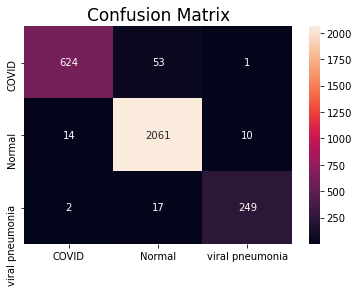

In [42]:
from sklearn.metrics import confusion_matrix
#compute the confusion matrix.
cm = confusion_matrix(y_test,prediction1)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['COVID','Normal','viral pneumonia'],
            yticklabels=['COVID','Normal','viral pneumonia'])
#plt.ylabel('Prediction',fontsize=13)
#plt.xlabel('y_test',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [43]:
import numpy as np

conf_matrix = np.array([[285, 20], [26, 841]])

def calculate_metrics(confusion_matrix):
    true_positives = confusion_matrix[1, 1]
    true_negatives = confusion_matrix[0, 0]
    false_positives = confusion_matrix[0, 1]
    false_negatives = confusion_matrix[1, 0]

    # Accuracy
    accuracy = (true_positives + true_negatives) / np.sum(confusion_matrix)

    # Precision
    precision = true_positives / (true_positives + false_positives)

    # Sensitivity (Recall)
    sensitivity = true_positives / (true_positives + false_negatives)

    # Specificity
    specificity = true_negatives / (true_negatives + false_positives)

    # F1 Score
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'F1 Score': f1_score
    }

# Calculate metrics
metrics = calculate_metrics(conf_matrix)

# Print the results
for metric, value in metrics.items():
    print(f"{metric}: {value}")

Accuracy: 0.9607508532423208
Precision: 0.9767711962833914
Sensitivity: 0.9700115340253749
Specificity: 0.9344262295081968
F1 Score: 0.9733796296296297


In [44]:
lgb_classifier.fit(mobile_features, y_train)

[LightGBM] [Warning] Unknown parameter: n_iterations


LGBMClassifier(learning_rate=0.24, max_depth=7, min_child_samples=40,
               n_estimators=300, n_iterations=250, num_leaves=105)

In [45]:
prediction2 = lgb_classifier.predict(X_test_mobile_features)

In [46]:
accuracy2 = accuracy_score(y_test, prediction2)
accuracy2

0.930056087099967

In [47]:
cm = confusion_matrix(y_test, prediction2)

In [50]:
def confusion_metrics(cm, class_name):
  report = classification_report(y_test, prediction2, target_names=categories, output_dict=True)


  if class_name == 'COVID':
      sensitivity = cm[0,0]/sum(cm[0,:])
      specificity = (cm[1,1]+cm[2,2])/(cm[1,0]+cm[2,0]+cm[1,1]+cm[2,2])
      precision = report[class_name]['precision']
      f1 = report[class_name]['f1-score']

  elif class_name == 'Normal':
      sensitivity = cm[2,2]/sum(cm[2,:])
      specificity = (cm[0,0]+cm[1,1])/(cm[0,2]+cm[1,2]+cm[0,0]+cm[1,1])
      precision = report[class_name]['precision']
      f1 = report[class_name]['f1-score']
  elif class_name == 'viral pneumonia':
      sensitivity = cm[2,2]/sum(cm[2,:])
      specificity = (cm[0,0]+cm[1,1])/(cm[0,2]+cm[1,2]+cm[0,0]+cm[1,1])
      precision = report[class_name]['precision']
      f1 = report[class_name]['f1-score']
 
  result = {'Sensitivity': sensitivity*100, 'Specificity': specificity *
              100, 'Precision': precision*100, 'F1-Score': f1*100}
  return result

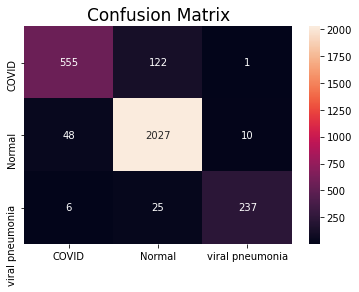

In [51]:
from sklearn.metrics import confusion_matrix
#compute the confusion matrix.
cm = confusion_matrix(y_test,prediction2)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['COVID','Normal','viral pneumonia'],
            yticklabels=['COVID','Normal','viral pneumonia'])
#plt.ylabel('Prediction',fontsize=13)
#plt.xlabel('y_test',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [52]:
import numpy as np

conf_matrix = np.array([[279, 26], [36, 831]])

def calculate_metrics(confusion_matrix):
    true_positives = confusion_matrix[1, 1]
    true_negatives = confusion_matrix[0, 0]
    false_positives = confusion_matrix[0, 1]
    false_negatives = confusion_matrix[1, 0]

    # Accuracy
    accuracy = (true_positives + true_negatives) / np.sum(confusion_matrix)

    # Precision
    precision = true_positives / (true_positives + false_positives)

    # Sensitivity (Recall)
    sensitivity = true_positives / (true_positives + false_negatives)

    # Specificity
    specificity = true_negatives / (true_negatives + false_positives)

    # F1 Score
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'F1 Score': f1_score
    }

# Calculate metrics
metrics = calculate_metrics(conf_matrix)

# Print the results
for metric, value in metrics.items():
    print(f"{metric}: {value}")

Accuracy: 0.947098976109215
Precision: 0.969661610268378
Sensitivity: 0.9584775086505191
Specificity: 0.9147540983606557
F1 Score: 0.9640371229698376


In [53]:
lgb_classifier.fit(efficientnet_features, y_train)

[LightGBM] [Warning] Unknown parameter: n_iterations


LGBMClassifier(learning_rate=0.24, max_depth=7, min_child_samples=40,
               n_estimators=300, n_iterations=250, num_leaves=105)

In [54]:
X_test_efficientnet_features = eff_base_model.predict(x_test)
X_test_efficientnet_features = X_test_efficientnet_features.reshape(X_test_dense_features.shape[0], -1)

In [55]:
prediction3 = lgb_classifier.predict(X_test_efficientnet_features)

In [56]:
accuracy3 = accuracy_score(y_test, prediction3)
accuracy3

0.9574397888485648

In [57]:
cm = confusion_matrix(y_test, prediction3)

In [59]:
def confusion_metrics(cm, class_name):
  report = classification_report(y_test, prediction3, target_names=categories, output_dict=True)


  if class_name == 'COVID':
      sensitivity = cm[0,0]/sum(cm[0,:])
      specificity = (cm[1,1]+cm[2,2])/(cm[1,0]+cm[2,0]+cm[1,1]+cm[2,2])
      precision = report[class_name]['precision']
      f1 = report[class_name]['f1-score']

  elif class_name == 'Normal':
      sensitivity = cm[2,2]/sum(cm[2,:])
      specificity = (cm[0,0]+cm[1,1])/(cm[0,2]+cm[1,2]+cm[0,0]+cm[1,1])
      precision = report[class_name]['precision']
      f1 = report[class_name]['f1-score']
  elif class_name == 'viral pneumonia':
      sensitivity = cm[2,2]/sum(cm[2,:])
      specificity = (cm[0,0]+cm[1,1])/(cm[0,2]+cm[1,2]+cm[0,0]+cm[1,1])
      precision = report[class_name]['precision']
      f1 = report[class_name]['f1-score']
 
  result = {'Sensitivity': sensitivity*100, 'Specificity': specificity *
              100, 'Precision': precision*100, 'F1-Score': f1*100}
  return result

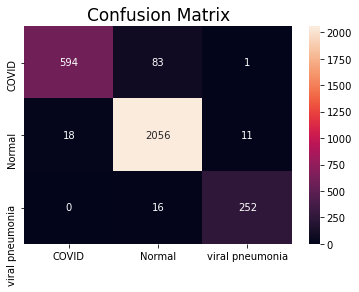

In [60]:
from sklearn.metrics import confusion_matrix
#compute the confusion matrix.
cm = confusion_matrix(y_test,prediction3)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['COVID','Normal','viral pneumonia'],
            yticklabels=['COVID','Normal','viral pneumonia'])
#plt.ylabel('Prediction',fontsize=13)
#plt.xlabel('y_test',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [61]:
import numpy as np

conf_matrix = np.array([[285, 20], [25, 842]])

def calculate_metrics(confusion_matrix):
    true_positives = confusion_matrix[1, 1]
    true_negatives = confusion_matrix[0, 0]
    false_positives = confusion_matrix[0, 1]
    false_negatives = confusion_matrix[1, 0]

    # Accuracy
    accuracy = (true_positives + true_negatives) / np.sum(confusion_matrix)

    # Precision
    precision = true_positives / (true_positives + false_positives)

    # Sensitivity (Recall)
    sensitivity = true_positives / (true_positives + false_negatives)

    # Specificity
    specificity = true_negatives / (true_negatives + false_positives)

    # F1 Score
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'F1 Score': f1_score
    }

# Calculate metrics
metrics = calculate_metrics(conf_matrix)

# Print the results
for metric, value in metrics.items():
    print(f"{metric}: {value}")

Accuracy: 0.96160409556314
Precision: 0.9767981438515081
Sensitivity: 0.9711649365628604
Specificity: 0.9344262295081968
F1 Score: 0.9739733950260265


In [11]:
eff_base_model1 = EfficientNetB1(weights='imagenet', include_top=True)

32161792/32148312 [==============================] - 16s 0us/step


In [12]:
efficientnet_features1 = eff_base_model1.predict(x_train)     

ValueError: in user code:

    D:\Anaconda1\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    D:\Anaconda1\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\Anaconda1\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\Anaconda1\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\Anaconda1\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\Anaconda1\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    D:\Anaconda1\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    D:\Anaconda1\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    D:\Anaconda1\lib\site-packages\keras\engine\input_spec.py:266 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer efficientnetb1: expected shape=(None, 240, 240, 3), found shape=(None, 224, 224, 3)
